In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import os
import pickle
from sklearn import preprocessing
from sklearn.svm import SVC as svc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
import os

In [15]:
current_dir = os.getcwd()
data_file = os.path.join(current_dir, 'data', 'diabetes_data.csv')
df = pd.read_csv(data_file, sep = ";")

In [16]:
X, y = df.drop('class', axis=1), df[['class']]
X = pd.get_dummies(X, columns=['gender'], prefix=['gender'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [18]:
len(X_train.columns)

17

In [19]:
rf = RandomForestClassifier(random_state = 42)
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 16, num = 8)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 25, cv = 5, verbose=2, random_state=42, n_jobs = 5)

In [21]:
rf_random.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=25, n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, 8, 10, 12, 14,
                                                      16],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

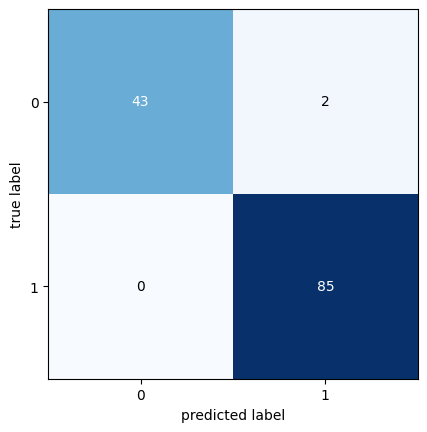

In [22]:
best_rf_random = rf_random.best_estimator_
pred = best_rf_random.predict(X_test)
conf_mat = confusion_matrix(y_true = y_test, y_pred= pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_mat)
plt.show()

Accuracy Score of the classifier is: 0.9846153846153847
Precision Score of the classifier is: 0.9770114942528736
Recall Score of the classifier is: 1.0
F1 Score of the classifier is: 0.9883720930232558
AUC for our classifier is: 0.998954248366013


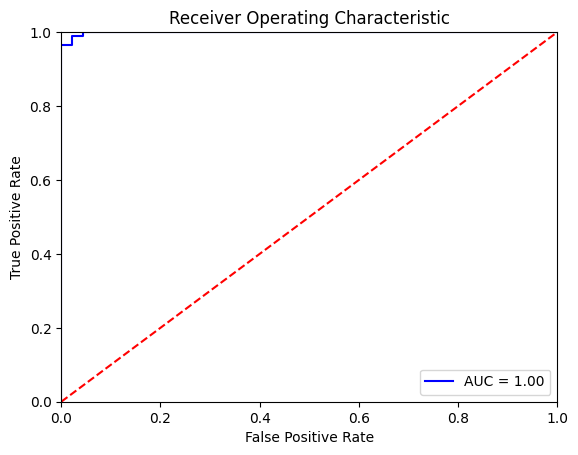

In [23]:
print(f"Accuracy Score of the classifier is: {accuracy_score(y_test, pred)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, pred)}")
print(f"Recall Score of the classifier is: {recall_score(y_test, pred)}")
print(f"F1 Score of the classifier is: {f1_score(y_test, pred)}")
class_probabilities = best_rf_random.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [24]:
current_dir = os.getcwd()
model_file = os.path.join(current_dir, 'models', 'stage_1', 'model_rf.pkl')
pickle.dump(best_rf_random, open(model_file, 'wb'))
#best_rf_random = pickle.load(open('model_rf.pkl', 'rb'))